In [2]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [5]:
#import citipy
from citipy import citipy

In [6]:
# creat a list for holding the cities
cities = []
# indentify the nearest cit for each lats and lngs combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if th ecity is unique, add it to cities list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count
len(cities)

602

In [7]:
import requests
from config import weather_api_key

In [8]:
from datetime import datetime

In [9]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ba8603d042cbbff2ce5028700661739'

In [10]:
boston_url= url + "&q="+"Boston"
print(boston_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ba8603d042cbbff2ce5028700661739&q=Boston


In [11]:
boston_weather=requests.get(boston_url).json()
boston_weather

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 49.35,
  'feels_like': 48.94,
  'temp_min': 46.72,
  'temp_max': 52.03,
  'pressure': 1010,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 53, 'gust': 17},
 'clouds': {'all': 90},
 'dt': 1635381765,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1635333092,
  'sunset': 1635371064},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an empty list to hold the weather data
city_data = []

# Print the begining of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list (using enumerate()).
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count=1
        
    # Create endpoint URL with eah city
    city_url = url + "&q="+city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} {set_count} | {city}")
    
    # Add 1 to the record count
    record_count +=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 1 | carnarvon
Processing Record 2 of Set 1 1 | mar del plata
Processing Record 3 of Set 1 1 | ushuaia
Processing Record 4 of Set 1 1 | ust-maya
Processing Record 5 of Set 1 1 | dir
Processing Record 6 of Set 1 1 | binghamton
Processing Record 7 of Set 1 1 | rio grande
Processing Record 8 of Set 1 1 | atuona
Processing Record 9 of Set 1 1 | souillac
Processing Record 10 of Set 1 1 | georgetown
Processing Record 11 of Set 1 1 | gazalkent
Processing Record 12 of Set 1 1 | mataura
Processing Record 13 of Set 1 1 | rikitea
Processing Record 14 of Set 1 1 | portage
Processing Record 15 of Set 1 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 1 | bengkulu
Processing Record 17 of Set 1 1 | castro
Processing Record 18 of Set 1 1 | barrow
Processing Record 19 of Set 1 1 | superior
Processing Record 20 of Set 1 1 | midland
Processing Record 21 of Set 1 1 | bredasdorp
Processing Rec

Processing Record 27 of Set 4 4 | grindavik
Processing Record 28 of Set 4 4 | tautira
Processing Record 29 of Set 4 4 | talnakh
Processing Record 30 of Set 4 4 | lorengau
Processing Record 31 of Set 4 4 | hami
Processing Record 32 of Set 4 4 | ouahigouya
Processing Record 33 of Set 4 4 | coahuayana
Processing Record 34 of Set 4 4 | hofn
Processing Record 35 of Set 4 4 | marsh harbour
Processing Record 36 of Set 4 4 | alice springs
Processing Record 37 of Set 4 4 | ambon
Processing Record 38 of Set 4 4 | saldanha
Processing Record 39 of Set 4 4 | diamantina
Processing Record 40 of Set 4 4 | zhob
Processing Record 41 of Set 4 4 | katsuura
Processing Record 42 of Set 4 4 | geraldton
Processing Record 43 of Set 4 4 | lompoc
Processing Record 44 of Set 4 4 | henties bay
Processing Record 45 of Set 4 4 | jardim
Processing Record 46 of Set 4 4 | inirida
Processing Record 47 of Set 4 4 | fairbanks
Processing Record 48 of Set 4 4 | high level
Processing Record 49 of Set 4 4 | palabuhanratu
City

Processing Record 10 of Set 8 8 | jingdezhen
Processing Record 11 of Set 8 8 | koster
Processing Record 12 of Set 8 8 | avera
Processing Record 13 of Set 8 8 | tambopata
Processing Record 14 of Set 8 8 | olinda
Processing Record 15 of Set 8 8 | ulkan
Processing Record 16 of Set 8 8 | marsa matruh
Processing Record 17 of Set 8 8 | kingston
Processing Record 18 of Set 8 8 | berdigestyakh
Processing Record 19 of Set 8 8 | vanavara
Processing Record 20 of Set 8 8 | ponta do sol
Processing Record 21 of Set 8 8 | kahta
Processing Record 22 of Set 8 8 | poddorye
Processing Record 23 of Set 8 8 | calella
Processing Record 24 of Set 8 8 | san vicente de canete
Processing Record 25 of Set 8 8 | sao joao da barra
Processing Record 26 of Set 8 8 | sitka
Processing Record 27 of Set 8 8 | praia da vitoria
Processing Record 28 of Set 8 8 | aiquile
Processing Record 29 of Set 8 8 | dekar
Processing Record 30 of Set 8 8 | turtas
Processing Record 31 of Set 8 8 | narsaq
Processing Record 32 of Set 8 8 |

Processing Record 39 of Set 11 11 | byron bay
Processing Record 40 of Set 11 11 | bilibino
Processing Record 41 of Set 11 11 | agva
City not found. Skipping...
Processing Record 42 of Set 11 11 | weston
Processing Record 43 of Set 11 11 | revelstoke
Processing Record 44 of Set 11 11 | leningradskiy
Processing Record 45 of Set 11 11 | belogradcik
City not found. Skipping...
Processing Record 46 of Set 11 11 | kulhudhuffushi
Processing Record 47 of Set 11 11 | svetlogorsk
Processing Record 48 of Set 11 11 | los llanos de aridane
Processing Record 49 of Set 11 11 | kathu
Processing Record 50 of Set 11 11 | phulabani
Processing Record 1 of Set 12 12 | urengoy
Processing Record 2 of Set 12 12 | emporia
Processing Record 3 of Set 12 12 | lazaro cardenas
Processing Record 4 of Set 12 12 | monte santo
Processing Record 5 of Set 12 12 | grimmen
Processing Record 6 of Set 12 12 | corinto
Processing Record 7 of Set 12 12 | sorland
Processing Record 8 of Set 12 12 | xingyi
Processing Record 9 of S

In [12]:
len(city_data)

560

In [13]:
city_data

[{'City': 'Jonkoping',
  'Lat': 57.7814,
  'Lng': 14.1562,
  'Max Temp': 45.39,
  'Humidity': 93,
  'Cloudiness': 90,
  'Wind Speed': 4.61,
  'Country': 'SE',
  'Date': '2021-10-25 00:28:02'},
 {'City': 'Bambous Virieux',
  'Lat': -20.3428,
  'Lng': 57.7575,
  'Max Temp': 74.21,
  'Humidity': 78,
  'Cloudiness': 40,
  'Wind Speed': 11.5,
  'Country': 'MU',
  'Date': '2021-10-25 00:28:03'},
 {'City': 'Fortuna',
  'Lat': 40.5982,
  'Lng': -124.1573,
  'Max Temp': 59.34,
  'Humidity': 79,
  'Cloudiness': 40,
  'Wind Speed': 1.01,
  'Country': 'US',
  'Date': '2021-10-25 00:28:03'},
 {'City': 'Upernavik',
  'Lat': 72.7868,
  'Lng': -56.1549,
  'Max Temp': 14.49,
  'Humidity': 66,
  'Cloudiness': 5,
  'Wind Speed': 6.04,
  'Country': 'GL',
  'Date': '2021-10-25 00:28:04'},
 {'City': 'Buala',
  'Lat': -8.145,
  'Lng': 159.5921,
  'Max Temp': 85.1,
  'Humidity': 70,
  'Cloudiness': 16,
  'Wind Speed': 1.12,
  'Country': 'SB',
  'Date': '2021-10-25 00:28:04'},
 {'City': 'Busselton',
  'Lat': -

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jonkoping,57.7814,14.1562,45.39,93,90,4.61,SE,2021-10-25 00:28:02
1,Bambous Virieux,-20.3428,57.7575,74.21,78,40,11.50,MU,2021-10-25 00:28:03
2,Fortuna,40.5982,-124.1573,59.34,79,40,1.01,US,2021-10-25 00:28:03
3,Upernavik,72.7868,-56.1549,14.49,66,5,6.04,GL,2021-10-25 00:28:04
4,Buala,-8.1450,159.5921,85.10,70,16,1.12,SB,2021-10-25 00:28:04
5,Busselton,-33.6500,115.3333,56.08,74,100,9.80,AU,2021-10-25 00:28:04
6,Belmonte,-15.8631,-38.8828,77.50,91,69,7.18,BR,2021-10-25 00:28:05
7,Chuy,-33.6971,-53.4616,58.30,70,0,10.31,UY,2021-10-25 00:28:05
8,Albany,42.6001,-73.9662,51.80,81,93,2.30,US,2021-10-25 00:24:06
9,Phillipsburg,40.6937,-75.1902,55.74,81,92,4.21,US,2021-10-25 00:27:51


In [15]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jonkoping,SE,2021-10-25 00:28:02,57.7814,14.1562,45.39,93,90,4.61
1,Bambous Virieux,MU,2021-10-25 00:28:03,-20.3428,57.7575,74.21,78,40,11.50
2,Fortuna,US,2021-10-25 00:28:03,40.5982,-124.1573,59.34,79,40,1.01
3,Upernavik,GL,2021-10-25 00:28:04,72.7868,-56.1549,14.49,66,5,6.04
4,Buala,SB,2021-10-25 00:28:04,-8.1450,159.5921,85.10,70,16,1.12
...,...,...,...,...,...,...,...,...,...
555,Rodino,RU,2021-10-25 00:31:24,52.5000,80.2500,42.44,69,95,14.16
556,Carballo,ES,2021-10-25 00:31:24,43.2130,-8.6910,57.51,94,60,4.05
557,Nhulunbuy,AU,2021-10-25 00:31:24,-12.2333,136.7667,88.41,58,40,9.22
558,Yumen,CN,2021-10-25 00:31:25,40.2833,97.2000,45.14,35,100,14.58


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

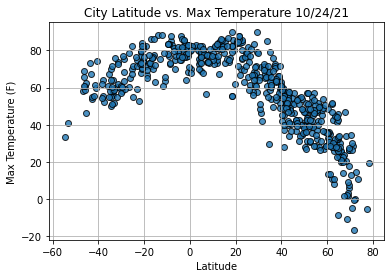

In [18]:
# Import time module
import time

# Build scatter plet for lat vs max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the otehr graph prperties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

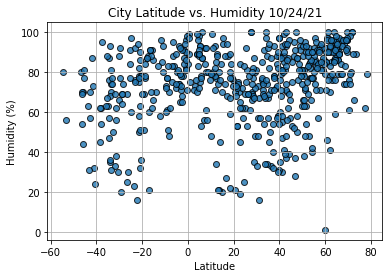

In [19]:
# Build scatter plet for lat vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the otehr graph prperties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

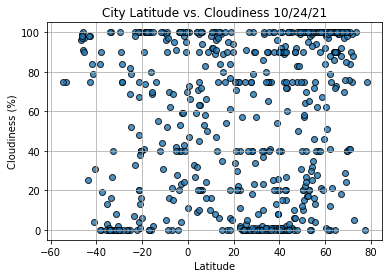

In [20]:
# Build scatter plet for lat vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the otehr graph prperties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

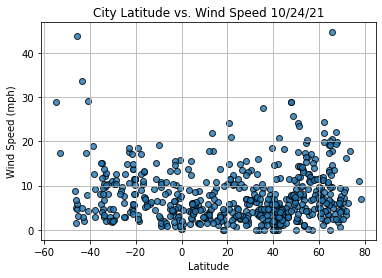

In [21]:
# Build scatter plet for lat vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the otehr graph prperties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [86]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " (r ="+ str(round(r_value,2)) + ")"
  
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    #plt.legend('line-regression r={}'.format(r_value))
    plt.show()

In [87]:
#get a specific row from a current DataFrame
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2021-10-25 00:28:07
Lat                        3.0707
Lng                      172.7902
Max Temp                    81.79
Humidity                       73
Cloudiness                     27
Wind Speed                   4.23
Name: 13, dtype: object

In [88]:
# filter a DataFrame based on a value of a row (eg. for latitudes greater than or equal to 0)
city_data_df["Lat"] >=0

0       True
1      False
2       True
3       True
4      False
       ...  
555     True
556     True
557    False
558     True
559    False
Name: Lat, Length: 560, dtype: bool

In [89]:
# return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jonkoping,SE,2021-10-25 00:28:02,57.7814,14.1562,45.39,93,90,4.61
2,Fortuna,US,2021-10-25 00:28:03,40.5982,-124.1573,59.34,79,40,1.01
3,Upernavik,GL,2021-10-25 00:28:04,72.7868,-56.1549,14.49,66,5,6.04
8,Albany,US,2021-10-25 00:24:06,42.6001,-73.9662,51.80,81,93,2.30
9,Phillipsburg,US,2021-10-25 00:27:51,40.6937,-75.1902,55.74,81,92,4.21


In [90]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

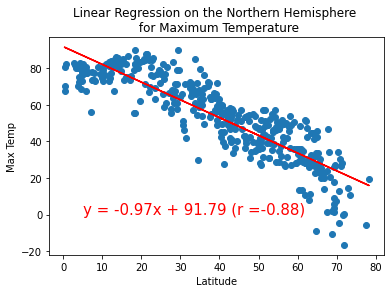

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,0))

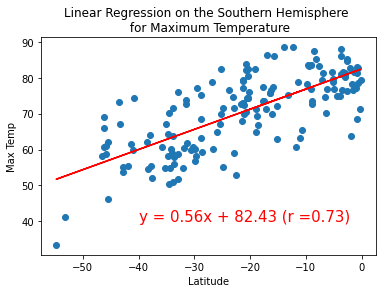

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-40, 40))


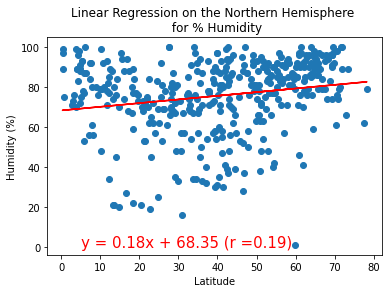

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 'Humidity (%)',(5,0))

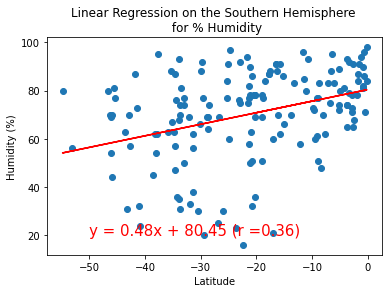

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 'Humidity (%)',(-50,20))

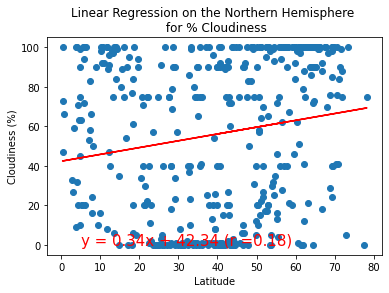

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness (%)',(5,0))

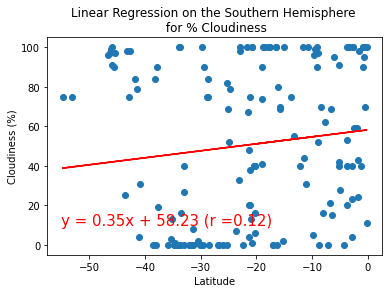

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness (%)',(-55,10))

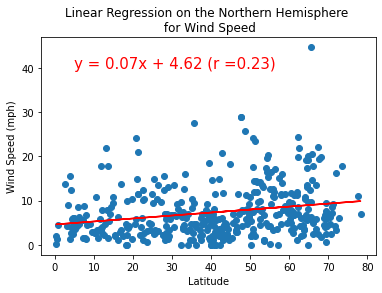

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(5,40))

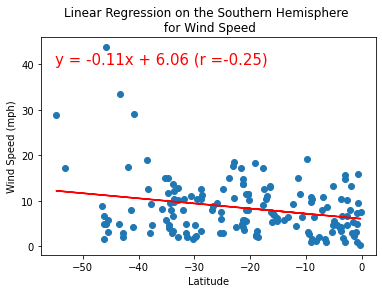

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-55,40))